**IMPORTING LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


**READING THE DATASET**

In [ ]:
df = pd.read_csv("/content/globalterrorismdb_0718dist.csv",encoding="ISO-8859-1")

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

**Pre-Processing The Dataset**

In [ ]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1210 entries, 0 to 1209
Columns: 135 entries, eventid to related
dtypes: float64(79), int64(7), object(49)
memory usage: 1.2+ MB


In [ ]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
df.shape

(1210, 135)

In [ ]:
df.nunique()

eventid       1210
iyear            3
imonth          13
iday            32
approxdate      11
              ... 
INT_LOG          3
INT_IDEO         3
INT_MISC         3
INT_ANY          3
related         48
Length: 135, dtype: int64

In [ ]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.210000e+03,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1190.000000,1190.000000,1209.000000,...,0.0,7.000000,0.0,0.0,57.000000,44.000000,1209.000000,1209.000000,1209.000000,1209.000000
mean,1.970593e+11,1970.534711,5.662810,14.782645,0.029752,248.118182,3.382645,34.806398,-59.408396,1.075269,...,NaN,116714.285714,NaN,NaN,2.456140,19.954545,-4.604632,-4.496278,0.277916,-3.555831
std,6.215254e+07,0.628153,3.295036,9.185877,0.169973,139.745770,3.410905,20.475755,55.349643,0.529080,...,NaN,131347.775372,NaN,NaN,0.946236,49.230806,4.553673,4.680366,0.757206,4.793283
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,11.000000,1.000000,-37.813187,-157.818968,1.000000,...,NaN,12000.000000,NaN,NaN,2.000000,1.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.970053e+11,1970.000000,3.000000,6.000000,0.000000,217.000000,1.000000,34.097866,-95.365295,1.000000,...,NaN,47500.000000,NaN,NaN,2.000000,1.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,1.970112e+11,1970.000000,5.000000,15.000000,0.000000,217.000000,1.000000,39.930771,-73.931351,1.000000,...,NaN,100000.000000,NaN,NaN,2.000000,1.000000,-9.000000,-9.000000,0.000000,0.000000
75%,1.971061e+11,1971.000000,8.000000,23.000000,0.000000,217.000000,8.000000,42.464047,-5.981749,1.000000,...,NaN,105000.000000,NaN,NaN,2.000000,3.250000,0.000000,0.000000,1.000000,1.000000
max,1.972032e+11,1972.000000,12.000000,31.000000,1.000000,603.000000,12.000000,59.332788,151.206890,5.000000,...,NaN,400000.000000,NaN,NaN,5.000000,187.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.columns.nunique()

135

In [ ]:
df['targtype1_txt'].unique()

array(['Private Citizens & Property', 'Government (Diplomatic)',
       'Journalists & Media', 'Police', 'Utilities', 'Military',
       'Government (General)', 'Airports & Aircraft', 'Business',
       'Educational Institution', 'Violent Political Party',
       'Religious Figures/Institutions', 'Unknown', 'Transportation',
       'Tourists', 'NGO', 'Telecommunication', 'Food or Water Supply',
       'Terrorists/Non-State Militia', 'Other', 'Maritime', nan],
      dtype=object)

In [ ]:
df['attacktype1_txt'].unique()

array(['Assassination', 'Hostage Taking (Kidnapping)',
       'Bombing/Explosion', 'Facility/Infrastructure Attack',
       'Armed Assault', 'Hijacking', 'Unknown', 'Unarmed Assault',
       'Hostage Taking (Barricade Incident)', nan], dtype=object)

In [ ]:
df.replace(np.nan,'0',inplace=True)

In [ ]:
df.isnull().sum()

eventid       0
iyear         0
imonth        0
iday          0
approxdate    0
             ..
INT_LOG       0
INT_IDEO      0
INT_MISC      0
INT_ANY       0
related       0
Length: 135, dtype: int64

In [ ]:
df.dtypes

eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
               ...  
INT_LOG       object
INT_IDEO      object
INT_MISC      object
INT_ANY       object
related       object
Length: 135, dtype: object

In [ ]:
df[df['country']==1].head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related


In [ ]:
df.corr()

,eventid,iyear,imonth,iday,extended,country,region
eventid,1.000000,0.998655,-0.173068,-0.039756,-0.087817,0.307345,0.335336
iyear,0.998655,1.000000,-0.223723,-0.042627,-0.087150,0.298625,0.327918
imonth,-0.173068,-0.223723,1.000000,0.033867,0.004636,0.100483,0.074265
iday,-0.039756,-0.042627,0.033867,1.000000,-0.008569,0.024051,-0.055473
extended,-0.087817,-0.087150,0.004636,-0.008569,1.000000,-0.152112,0.105895
country,0.307345,0.298625,0.100483,0.024051,-0.152112,1.000000,0.393747
region,0.335336,0.327918,0.074265,-0.055473,0.105895,0.393747,1.000000


In [ ]:
df.dropna(inplace=True)

In [ ]:
df = df[['eventid','iyear','imonth','iday','approxdate','extended','country','country_txt','region','latitude','longitude','city','specificity','crit1','targtype1','weapsubtype1_txt']]


In [ ]:
df.isna()

,eventid,iyear,imonth,iday,approxdate,extended,country,country_txt,region,latitude,longitude,city,specificity,crit1,targtype1,weapsubtype1_txt
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1206,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1207,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1208,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'country', 'country_txt', 'region', 'latitude', 'longitude', 'city',
       'specificity', 'crit1', 'targtype1', 'weapsubtype1_txt'],
      dtype='object')

In [ ]:
df=df.rename(columns={'eventid':'EventID','iyear':'Year','imonth':'Month','iday':'Day','extended':'Extended','country_txt':'Country_name','region':'Region','longitude':'Long','latitude':'Latitude','city':'City','targtype1':'TargetType','weapsubtype1_txt':'WeapSubType1'})

In [ ]:
df.columns

Index(['EventID', 'Year', 'Month', 'Day', 'approxdate', 'Extended', 'country',
       'Country_name', 'Region', 'Latitude', 'Long', 'City', 'specificity',
       'crit1', 'TargetType', 'WeapSubType1'],
      dtype='object')

In [ ]:
df

,EventID,Year,Month,Day,approxdate,Extended,country,Country_name,Region,Latitude,Long,City,specificity,crit1,TargetType,WeapSubType1
0,197000000001,1970,7,2,0,0,58,Dominican Republic,2,18.456792,-69.951164,Santo Domingo,1.0,1.0,14.0,0
1,197000000002,1970,0,0,0,0,130,Mexico,1,19.371887,-99.086624,Mexico city,1.0,1.0,7.0,0
2,197001000001,1970,1,0,0,0,160,Philippines,5,15.478598,120.599741,Unknown,4.0,1.0,10.0,0
3,197001000002,1970,1,0,0,0,78,Greece,8,37.99749,23.762728,Athens,1.0,1.0,7.0,Unknown Explosive Type
4,197001000003,1970,1,0,0,0,101,Japan,4,33.580412,130.396361,Fukouka,1.0,1.0,7.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,197203110001,1972,3,11,0,0,217,United States,1,40.697132,-73.931351,New York City,1.0,1.0,14.0,Molotov Cocktail/Petrol Bomb
1206,197203120001,1972,3,12,0,0,603,United Kingdom,8,54.607712,-5.95621,Belfast,1.0,1.0,4.0,Rifle/Shotgun (non-automatic)
1207,197203130001,1972,3,13,0,0,603,United Kingdom,8,54.607712,-5.95621,Belfast,1.0,1.0,14.0,Unknown Gun Type
1208,197203150001,1972,3,15,0,0,603,United Kingdom,8,54.536706,-6.70361,Coalisland,1.0,1.0,3.0,Unknown Gun Type


In [ ]:
df['Day'].sum()

17887

In [ ]:
df.head()

,EventID,Year,Month,Day,approxdate,Extended,country,Country_name,Region,Latitude,Long,City,specificity,crit1,TargetType,WeapSubType1
0,197000000001,1970,7,2,0,0,58,Dominican Republic,2,18.456792,-69.951164,Santo Domingo,1.0,1.0,14.0,0
1,197000000002,1970,0,0,0,0,130,Mexico,1,19.371887,-99.086624,Mexico city,1.0,1.0,7.0,0
2,197001000001,1970,1,0,0,0,160,Philippines,5,15.478598,120.599741,Unknown,4.0,1.0,10.0,0
3,197001000002,1970,1,0,0,0,78,Greece,8,37.99749,23.762728,Athens,1.0,1.0,7.0,Unknown Explosive Type
4,197001000003,1970,1,0,0,0,101,Japan,4,33.580412,130.396361,Fukouka,1.0,1.0,7.0,0


In [ ]:
per_Nan = [(c, df[c].isna().mean()*100) for c in df]
per_Nan = pd.DataFrame(per_Nan, columns=["column_name", "Percentage"])
per_Nan

,column_name,Percentage
0,EventID,0.0
1,Year,0.0
2,Month,0.0
3,Day,0.0
4,approxdate,0.0
5,Extended,0.0
6,country,0.0
7,Country_name,0.0
8,Region,0.0
9,Latitude,0.0


In [ ]:
#number_of_affected = df[['Region','specificity','TargetType']]
#number_of_affected = number_of_affected.groupby(by=['Region']).sum().reset_index().sort_values(by=['TargetType'], ascending = False)
#number_of_affected

In [ ]:
df.tail()

,EventID,Year,Month,Day,approxdate,Extended,country,Country_name,Region,Latitude,Long,City,specificity,crit1,TargetType,WeapSubType1
1205,197203110001,1972,3,11,0,0,217,United States,1,40.697132,-73.931351,New York City,1.0,1.0,14.0,Molotov Cocktail/Petrol Bomb
1206,197203120001,1972,3,12,0,0,603,United Kingdom,8,54.607712,-5.95621,Belfast,1.0,1.0,4.0,Rifle/Shotgun (non-automatic)
1207,197203130001,1972,3,13,0,0,603,United Kingdom,8,54.607712,-5.95621,Belfast,1.0,1.0,14.0,Unknown Gun Type
1208,197203150001,1972,3,15,0,0,603,United Kingdom,8,54.536706,-6.70361,Coalisland,1.0,1.0,3.0,Unknown Gun Type
1209,197203150002,1972,3,15,0,0,603,United Kingdom,8,0,0,Belfa,0,0,0,0


In [ ]:
for col in df.columns:
  print('{} : {}'.format(col,df[col].unique()))

EventID : [197000000001 197000000002 197001000001 ... 197203130001 197203150001
 197203150002]
Year : [1970 1971 1972]
Month : [ 7  0  1  2  3  4  5  6  8  9 10 11 12]
Day : [ 2  0  1  3  6  8  9 10 11 12 13 14 15 19 20 21 22 25 26 27 28 30 31  4
  7 16 17 18 23 24  5 29]
approxdate : ['0' 'January 19-20, 1970' 'February 6-9, 1970' 'February 11-14, 1970'
 'February 16-17, 1970' 'March 16-17, 1970' 'May 27 - June 5, 1970'
 'February 25-28, 1971' 'March 6-7, 1971' 'June 14-16, 1971'
 'June 24-25, 1971' 'July 18-19, 1971']
Extended : [0 1]
country : [ 58 130 160  78 101 217 218  98 499  65  83 222 362 199 102 185  30  60
  11 110  96 209 158  94 603  45  26 145 142  21  38  14 153 230 198  49
 406  36  97 161 201 156 106 155  15 236  92]
Country_name : ['Dominican Republic' 'Mexico' 'Philippines' 'Greece' 'Japan'
 'United States' 'Uruguay' 'Italy' 'East Germany (GDR)' 'Ethiopia'
 'Guatemala' 'Venezuela' 'West Germany (FRG)' 'Switzerland' 'Jordan'
 'Spain' 'Brazil' 'Egypt' 'Argentina' 'Leb

**DATA VISUASLIZATION**

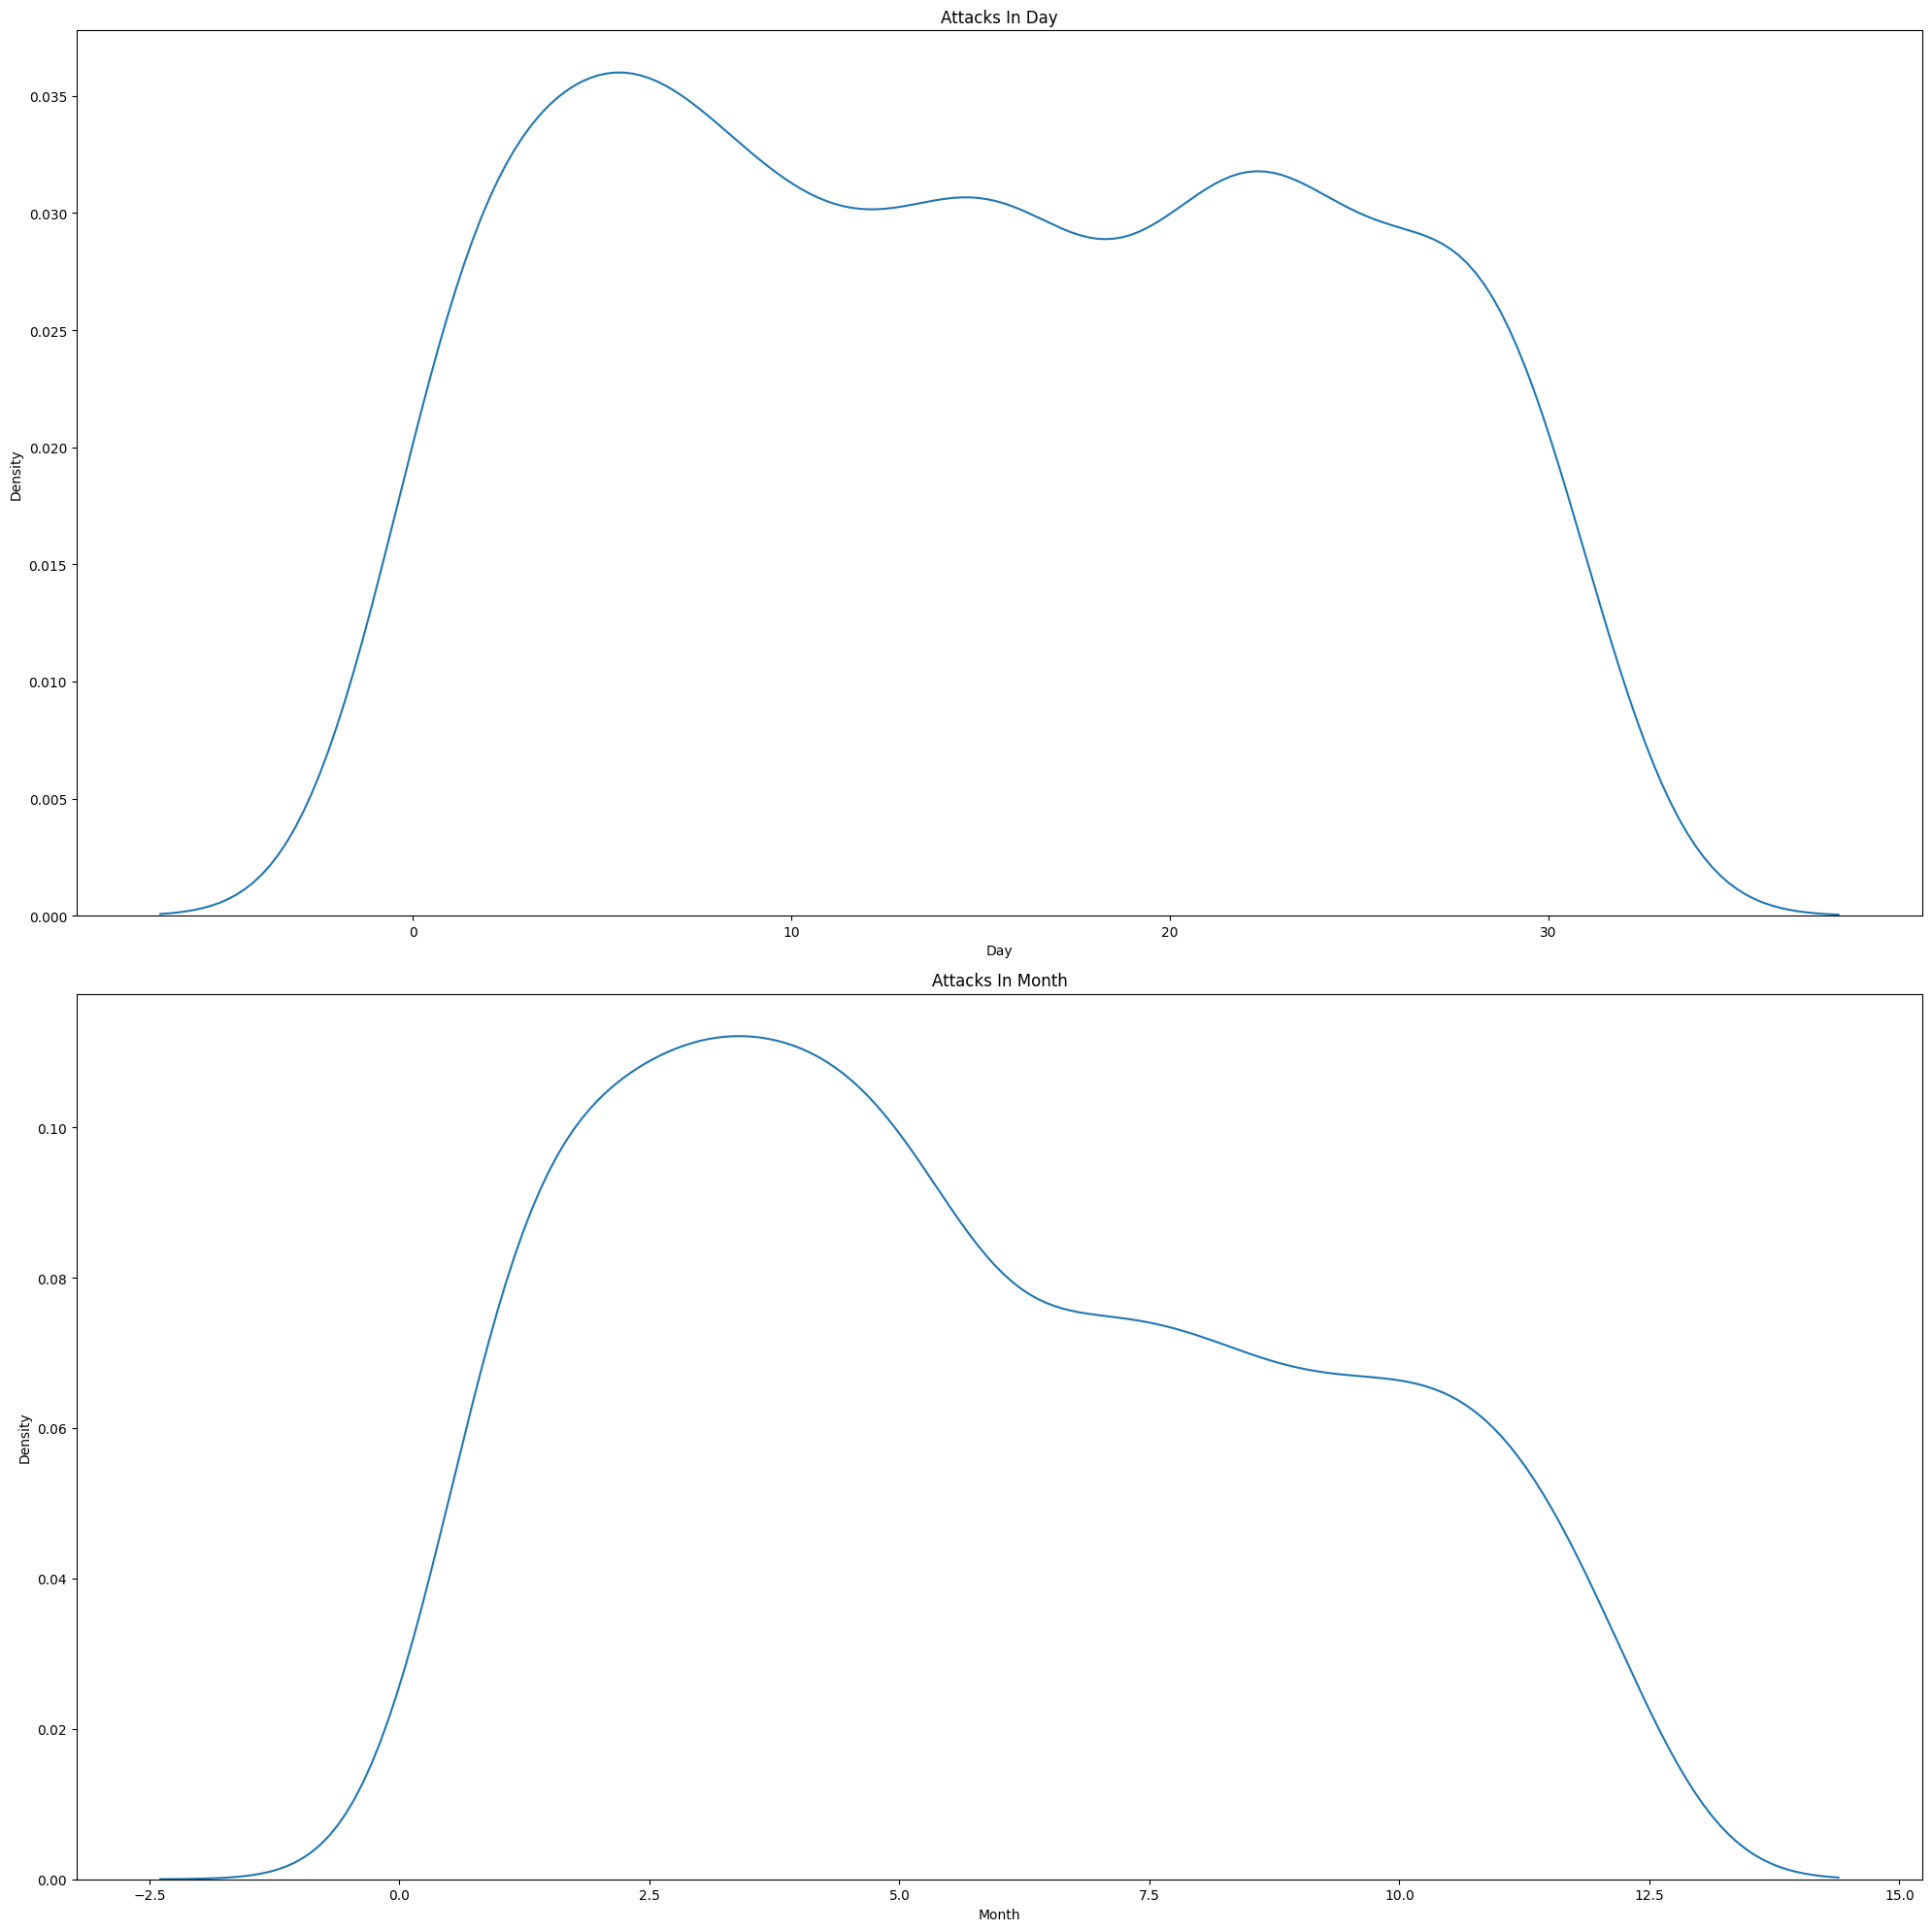

In [ ]:
plt.figure(figsize=(20,20))
heading=['Attacks In Day','Attacks In Month']
columns=['Day','Month']
for i,col in enumerate(columns):
  plt.subplot(2,1,i+1)
  plt.title(heading[i])
  sns.kdeplot(x=df[col])
plt.tight_layout()
plt.show()

<Axes: >

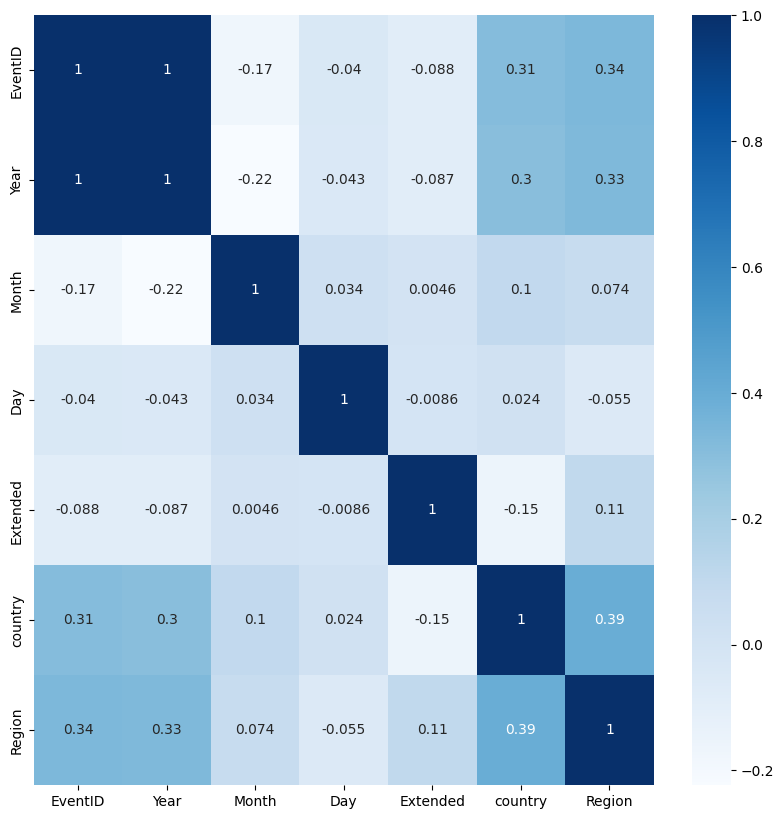

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

<Axes: >

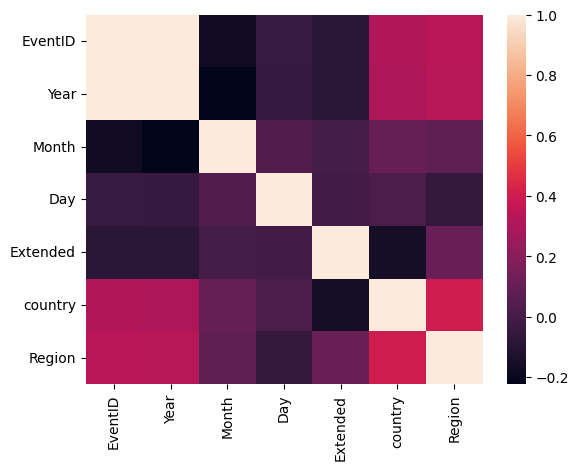

In [ ]:
sns.heatmap(df.corr())

<Axes: >

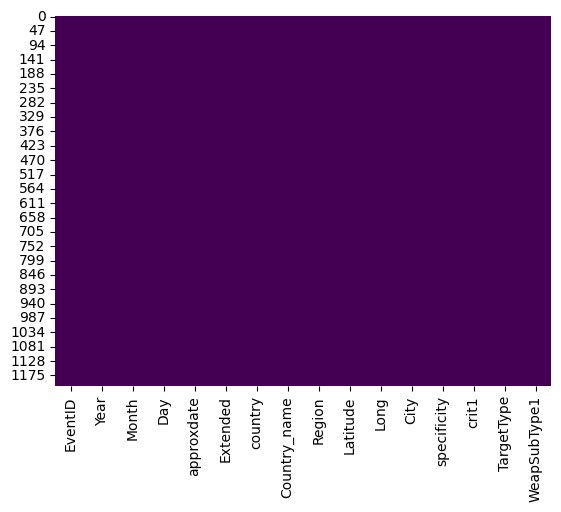

In [ ]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

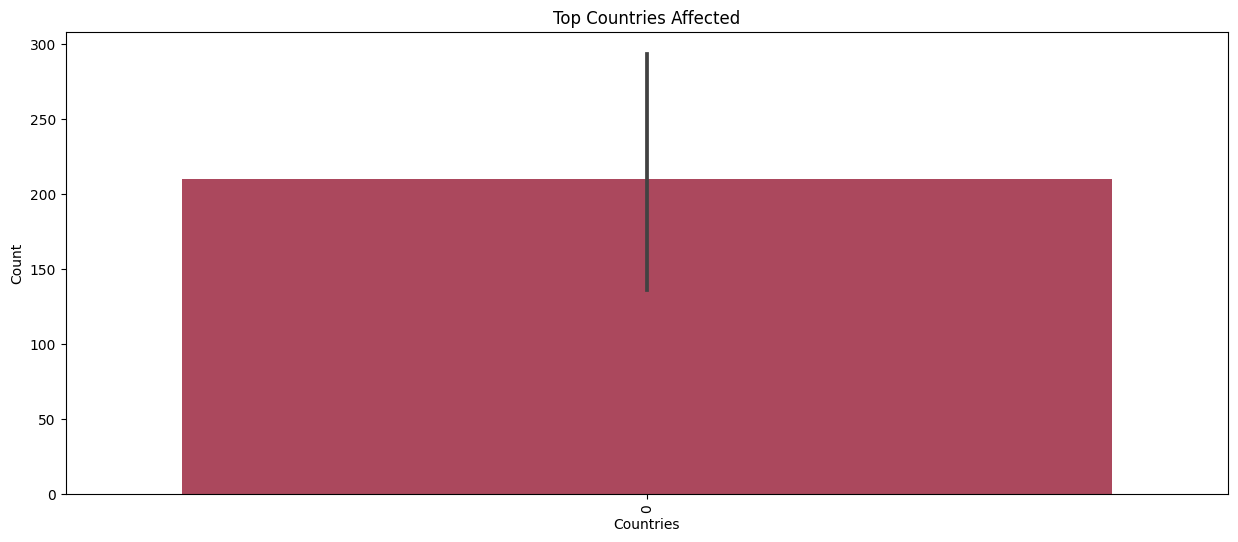

In [ ]:
plt.subplots(figsize=(15,6))
sns.barplot(df['country'].value_counts()[:15].index,palette='inferno')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

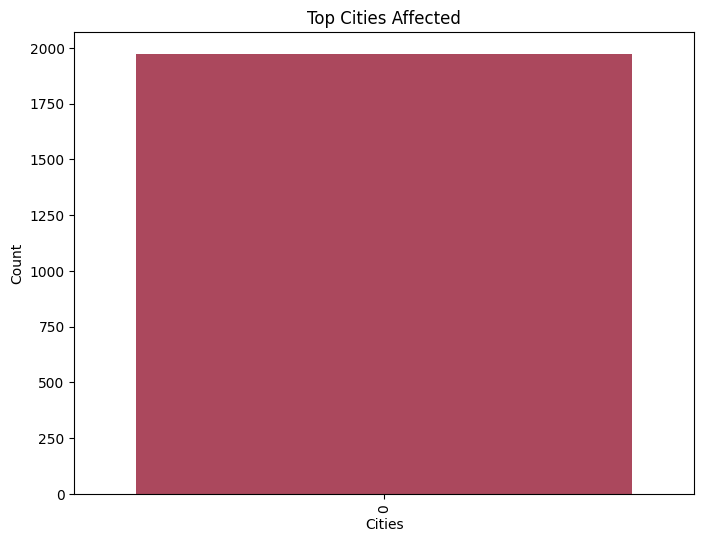

In [ ]:
plt.subplots(figsize=(8,6))
sns.barplot(df['Year'].value_counts()[1:15].index,palette='inferno')
plt.title('Top Cities Affected')
plt.xlabel('Cities')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()


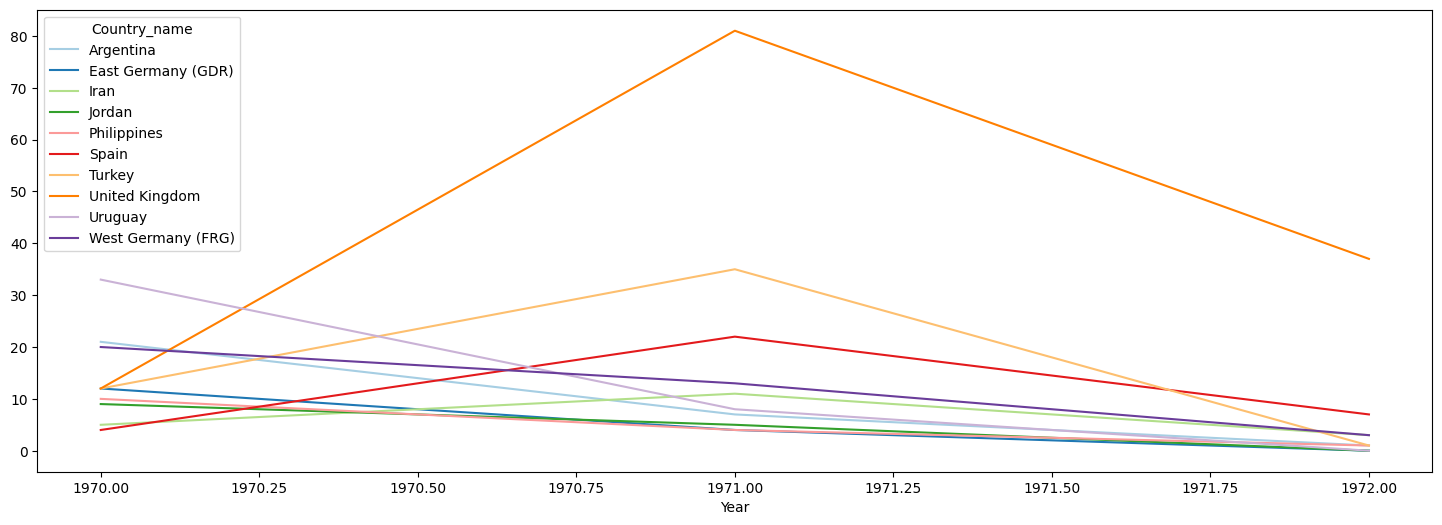

In [ ]:
top_groups10=df[df['Country_name'].isin(df['Country_name'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.Year,top_groups10.Country_name).plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

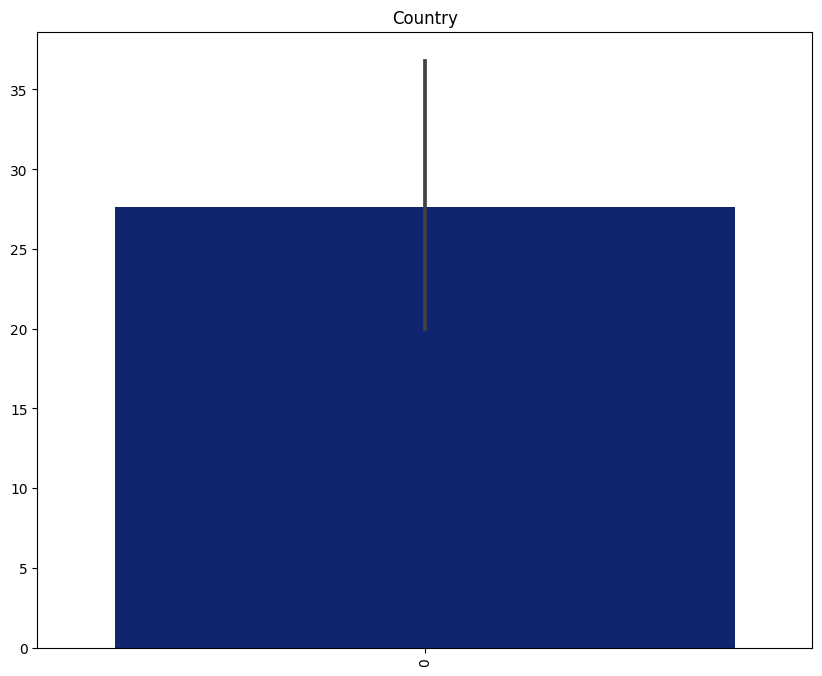

In [ ]:
sns.barplot(df['Latitude'].value_counts()[1:15].values,palette=('dark'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Country')
plt.show()

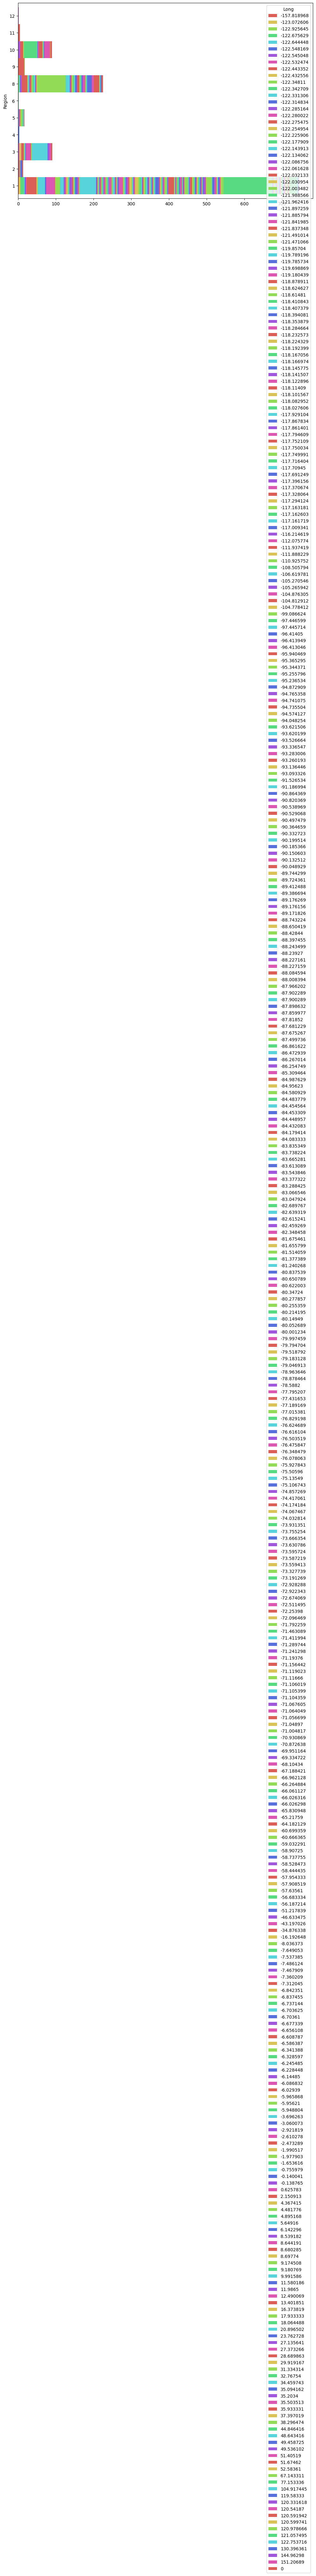

In [ ]:
pd.crosstab(df.Region,df.Long).plot.barh(stacked=True,width=1,color=sns.color_palette('hls',8))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

In [ ]:
df['WeapSubType1'].value_counts()

Unknown Explosive Type                       389
0                                            155
Molotov Cocktail/Petrol Bomb                 128
Dynamite/TNT                                  83
Unknown Gun Type                              79
Pipe Bomb                                     56
Time Fuse                                     54
Automatic or Semi-Automatic Rifle             49
Rifle/Shotgun (non-automatic)                 43
Gasoline or Alcohol                           42
Handgun                                       39
Arson/Fire                                    35
Other Explosive Type                          22
Vehicle                                       13
Projectile (rockets, mortars, RPGs, etc.)      5
Grenade                                        4
Landmine                                       4
Letter Bomb                                    3
Blunt Object                                   2
Knife or Other Sharp Object                    2
Sticky Bomb         